In [260]:
# import of all required modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, max_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
SEED = 100

In [261]:
Performance = []
regressor_names = []

In [262]:
# get the boston dataset from the skleran.datasets
X, y = datasets.load_boston(return_X_y=True)
data = datasets.load_boston()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [263]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['price'] = data.target

**Step 1 - Data Processing**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68cbaf5b90>,
      dtype=object)

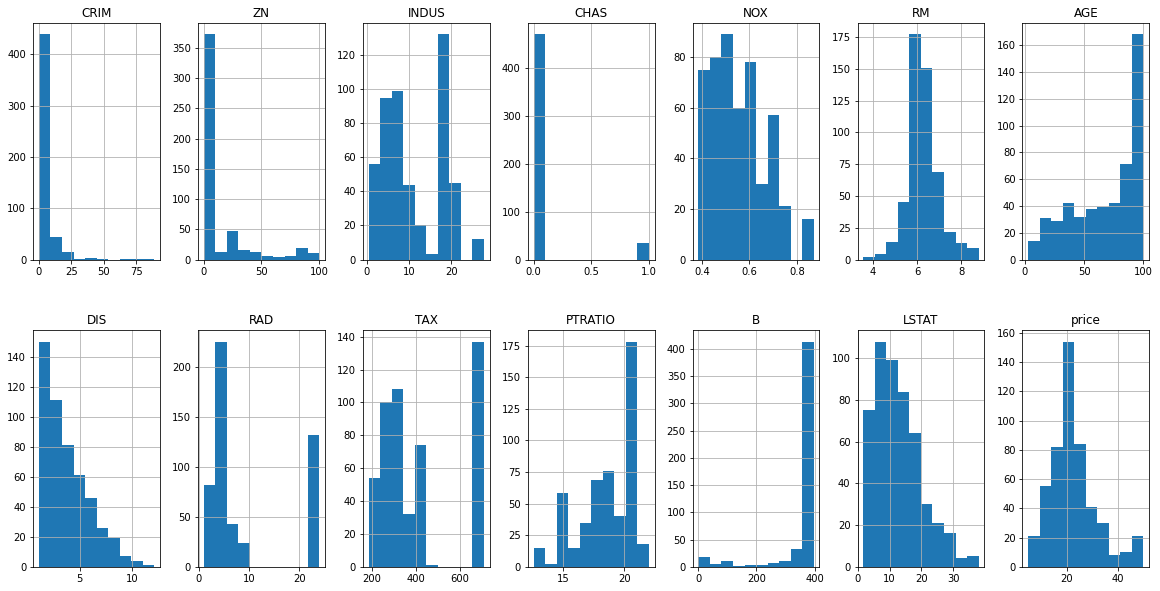

In [264]:
# Data Vizualization
fig, axis = plt.subplots(2,7,figsize=(20, 10))
df.hist(ax=axis)

In [265]:
# view the first five columns
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [266]:
data = df

In [267]:
# view the stats of the dataset
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


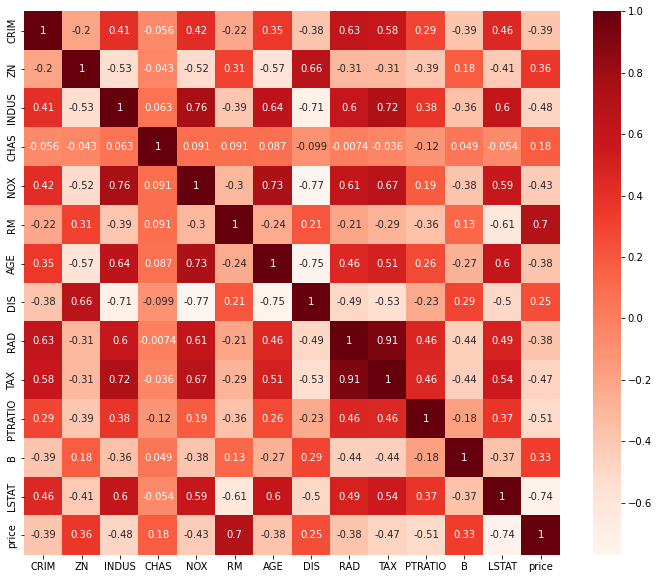

In [268]:
# Visualize the correlation 
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**Step 2 - Training & Test Dataset**

In [269]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=SEED)

**Step 3 - Train the model**

We used multiple models and compared their performance in the end.

In [270]:
# train Bayesian Ridge (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html?highlight=linear_model)
reg = BayesianRidge()
reg.fit(X_train, y_train)
preds = reg.predict(X_test)

In [271]:
# check different metrics
print(f" r2 score: {r2_score(preds, y_test)}\n max error: {max_error(preds, y_test)}\n mean absolut error: {mean_absolute_error(preds, y_test)}")
Performance.append(round(r2_score(preds, y_test) * 100,2))
regressor_names.append('Bayesian Ridge')

 r2 score: 0.730841265940247
 max error: 11.84097283734993
 mean absolut error: 2.805364884042335


In [272]:
reg = make_pipeline(StandardScaler(), BayesianRidge())
reg.fit(X_train, y_train)
preds = reg.predict(X_test)

In [273]:
# check different metrics
print(f" r2 score: {r2_score(preds, y_test)}\n max error: {max_error(preds, y_test)}\n mean absolut error: {mean_absolute_error(preds, y_test)}")
Performance.append(round(r2_score(preds, y_test) * 100,2))
regressor_names.append('Bayesiand Ridge with Normalization')

 r2 score: 0.7610231609640256
 max error: 10.850742294250011
 mean absolut error: 2.6683623135095953


In [274]:
kneigh = KNeighborsRegressor()
kneigh.fit(X_train, y_train)
preds = kneigh.predict(X_test)

In [275]:
print(f" r2 score: {r2_score(preds, y_test)}\n max error: {max_error(preds, y_test)}\n mean absolut error: {mean_absolute_error(preds, y_test)}")
Performance.append(round(r2_score(preds, y_test) * 100,2))
regressor_names.append('KNeighbor Regressor')

 r2 score: 0.4639399018312179
 max error: 17.22
 mean absolut error: 4.2494736842105265


In [276]:
reg = make_pipeline(StandardScaler(), KNeighborsRegressor())
reg.fit(X_train, y_train)
preds = reg.predict(X_test)

In [277]:
print(f" r2 score: {r2_score(preds, y_test)}\n max error: {max_error(preds, y_test)}\n mean absolut error: {mean_absolute_error(preds, y_test)}")
Performance.append(round(r2_score(preds, y_test) * 100,2))
regressor_names.append('KNeighbor Regressor with Normalization')

 r2 score: 0.7340890354568375
 max error: 18.76
 mean absolut error: 2.435526315789473


In [278]:
reg = MLPRegressor()
reg.fit(X_train, y_train)
preds = reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [279]:
print(f" r2 score: {r2_score(preds, y_test)}\n max error: {max_error(preds, y_test)}\n mean absolut error: {mean_absolute_error(preds, y_test)}")
Performance.append(round(r2_score(preds, y_test) * 100,2))
regressor_names.append('MLP')

 r2 score: 0.48003810959636284
 max error: 19.14448243158106
 mean absolut error: 3.553130880363539


In [280]:
reg = make_pipeline(StandardScaler(), MLPRegressor())
reg.fit(X_train, y_train)
preds = reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [281]:
print(f" r2 score: {r2_score(preds, y_test)}\n max error: {max_error(preds, y_test)}\n mean absolut error: {mean_absolute_error(preds, y_test)}")
Performance.append(round(r2_score(preds, y_test) * 100,2))
regressor_names.append('MLP with Normalization')

 r2 score: 0.7763090076828312
 max error: 13.517624188379425
 mean absolut error: 3.221486668649712


Including Feature Selection to see how it affects the Performance

In [282]:
# select features with low correlation
drop_columns = abs(cor['price'][abs(cor['price']) < 0.39]).index.tolist()

In [283]:
# drop the features with low correlation
cutted_data = data.drop(columns=drop_columns)

In [284]:
cutted_data

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,price
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...
501,11.93,0.573,6.593,273.0,21.0,9.67,22.4
502,11.93,0.573,6.120,273.0,21.0,9.08,20.6
503,11.93,0.573,6.976,273.0,21.0,5.64,23.9
504,11.93,0.573,6.794,273.0,21.0,6.48,22.0


In [285]:
X = cutted_data.drop('price', axis='columns')
y = cutted_data.price

In [286]:
X

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
0,2.31,0.538,6.575,296.0,15.3,4.98
1,7.07,0.469,6.421,242.0,17.8,9.14
2,7.07,0.469,7.185,242.0,17.8,4.03
3,2.18,0.458,6.998,222.0,18.7,2.94
4,2.18,0.458,7.147,222.0,18.7,5.33
...,...,...,...,...,...,...
501,11.93,0.573,6.593,273.0,21.0,9.67
502,11.93,0.573,6.120,273.0,21.0,9.08
503,11.93,0.573,6.976,273.0,21.0,5.64
504,11.93,0.573,6.794,273.0,21.0,6.48


In [287]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [288]:
# split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=SEED)

In [289]:
reg = BayesianRidge()
reg.fit(X_train, y_train)
preds = reg.predict(X_test)

In [290]:
print(f" r2 score: {r2_score(preds, y_test)}\n max error: {max_error(preds, y_test)}\n mean absolut error: {mean_absolute_error(preds, y_test)}")
Performance.append(round(r2_score(preds, y_test) * 100,2))
regressor_names.append('Bayesian ridge with Features Selection')

 r2 score: 0.6528004415920821
 max error: 11.791801163758066
 mean absolut error: 3.2800413628571943


In [291]:
kneigh = KNeighborsRegressor()
kneigh.fit(X_train, y_train)
preds = kneigh.predict(X_test)

In [292]:
print(f" r2 score: {r2_score(preds, y_test)}\n max error: {max_error(preds, y_test)}\n mean absolut error: {mean_absolute_error(preds, y_test)}")
Performance.append(round(r2_score(preds, y_test) * 100,2))
regressor_names.append('KNeighbors Regressor with Feature Selection')

 r2 score: 0.6722895153662041
 max error: 13.74
 mean absolut error: 3.2013157894736843


**Step 4 - Performance Evaluation**

In [293]:
Performance 

[73.08, 76.1, 46.39, 73.41, 48.0, 77.63, 65.28, 67.23]

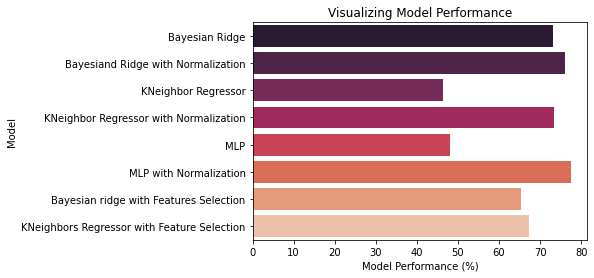

In [294]:
# Creating a bar plot
sns.barplot(x=Performance, y=regressor_names, palette= 'rocket')
# Add labels to your graph
plt.xlabel('Model Performance (%)')
plt.ylabel('Model')
plt.title("Visualizing Model Performance")
plt.show()